Задание 1. Мельчук А.Б.

    
    Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

### Реализуем гибкий фильтр резкости изображения по аналогии с тем, что как делаем в фотошопе. 

    Делаем аналог high pass фильтра, который находит границы у серого изображения.
    Далее в HSV поднимем яркость изображения на границах, используя границы как маску.

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage.color import rgb2hsv, hsv2rgb

(600, 900, 3)


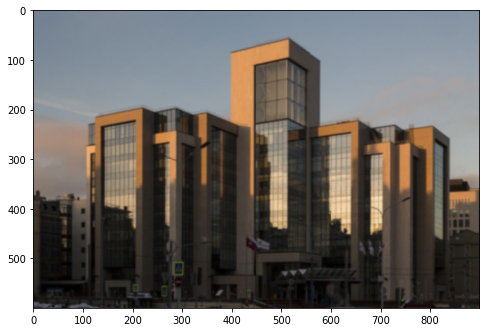

In [123]:
img = imageio.imread('lukoil_src_blur.jpg')
img = img.astype(np.float32) / 255.
print(img.shape)
plt.figure(figsize=(8, 8))
plt.imshow(img)

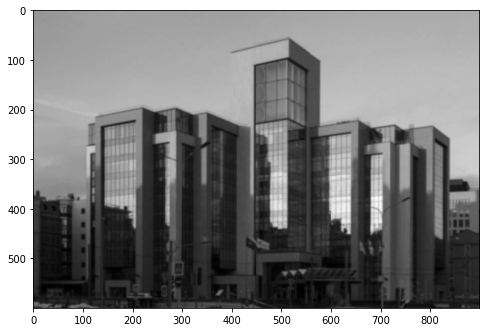

In [124]:
img_to_gray = np.mean(img, axis=2)
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

In [125]:
def edges_conv(img, axis=0):
    
    res = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)  
    img = np.pad(img, (1,), 'minimum') # + 1px border in order to get the same src size
    
    w = np.array([
                [1.,1.,1.],
                [0.,0.,0.],
                [-1.,-1.,-1.]]) if axis else np.array([
              [1.,0.,-1.],
              [1.,0.,-1.],
              [1.,0.,-1.]])
    
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            x = img[i:i+w.shape[0], j:j+w.shape[1]]
            res[i,j] = np.sum(w * x)
    return res

img_edges = edges_conv(img_to_gray, axis=0) + edges_conv(img_to_gray, axis=1)

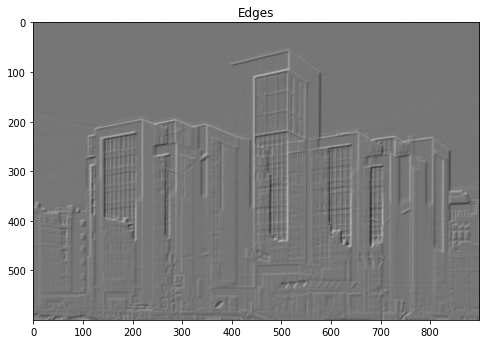

In [126]:
plt.figure(figsize=(8, 8))
plt.title('Edges')
plt.imshow(img_edges, cmap='gray')

#### Применим фильтры к каналу яркости насыщенность в HSV по найденной маске

In [127]:
img_hsv_filtered = rgb2hsv(img)
img_hsv_filtered[:, :, 2] +=0.5*img_edges
img_hsv_filtered[:, :, 1] +=0.2*img_edges

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


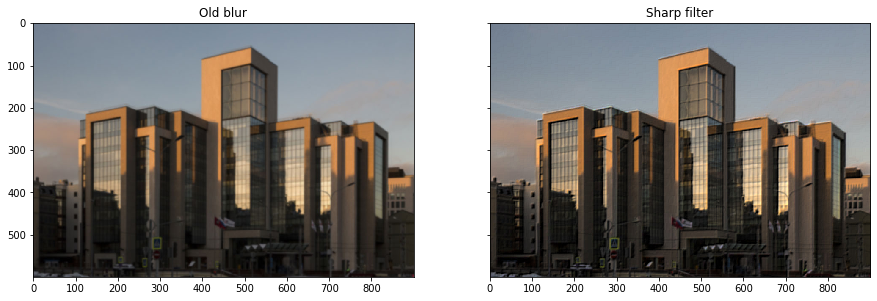

In [128]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize = (15,8))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Old blur')
axes[1].imshow(hsv2rgb(img_hsv_filtered), cmap=plt.cm.gray)
axes[1].set_title('Sharp filter')
plt.show()